# After evaluating all the models after implementing various feature selection methods we deduced that ExtraTreeRegressor is the best prediction model for the kind of Data Set we have.

# Also when we ran the tpot feature we first got Random Forest Algorithm as the answer and when we ran it the second time we got ExtraTree Regressor as  the result.


In [6]:
from sklearn.pipeline import Pipeline## imporing the librarires
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pylab import rcParams
import seaborn as sns 
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from boruta import BorutaPy

C:\Users\rishi\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Perfomring Feature Engineering

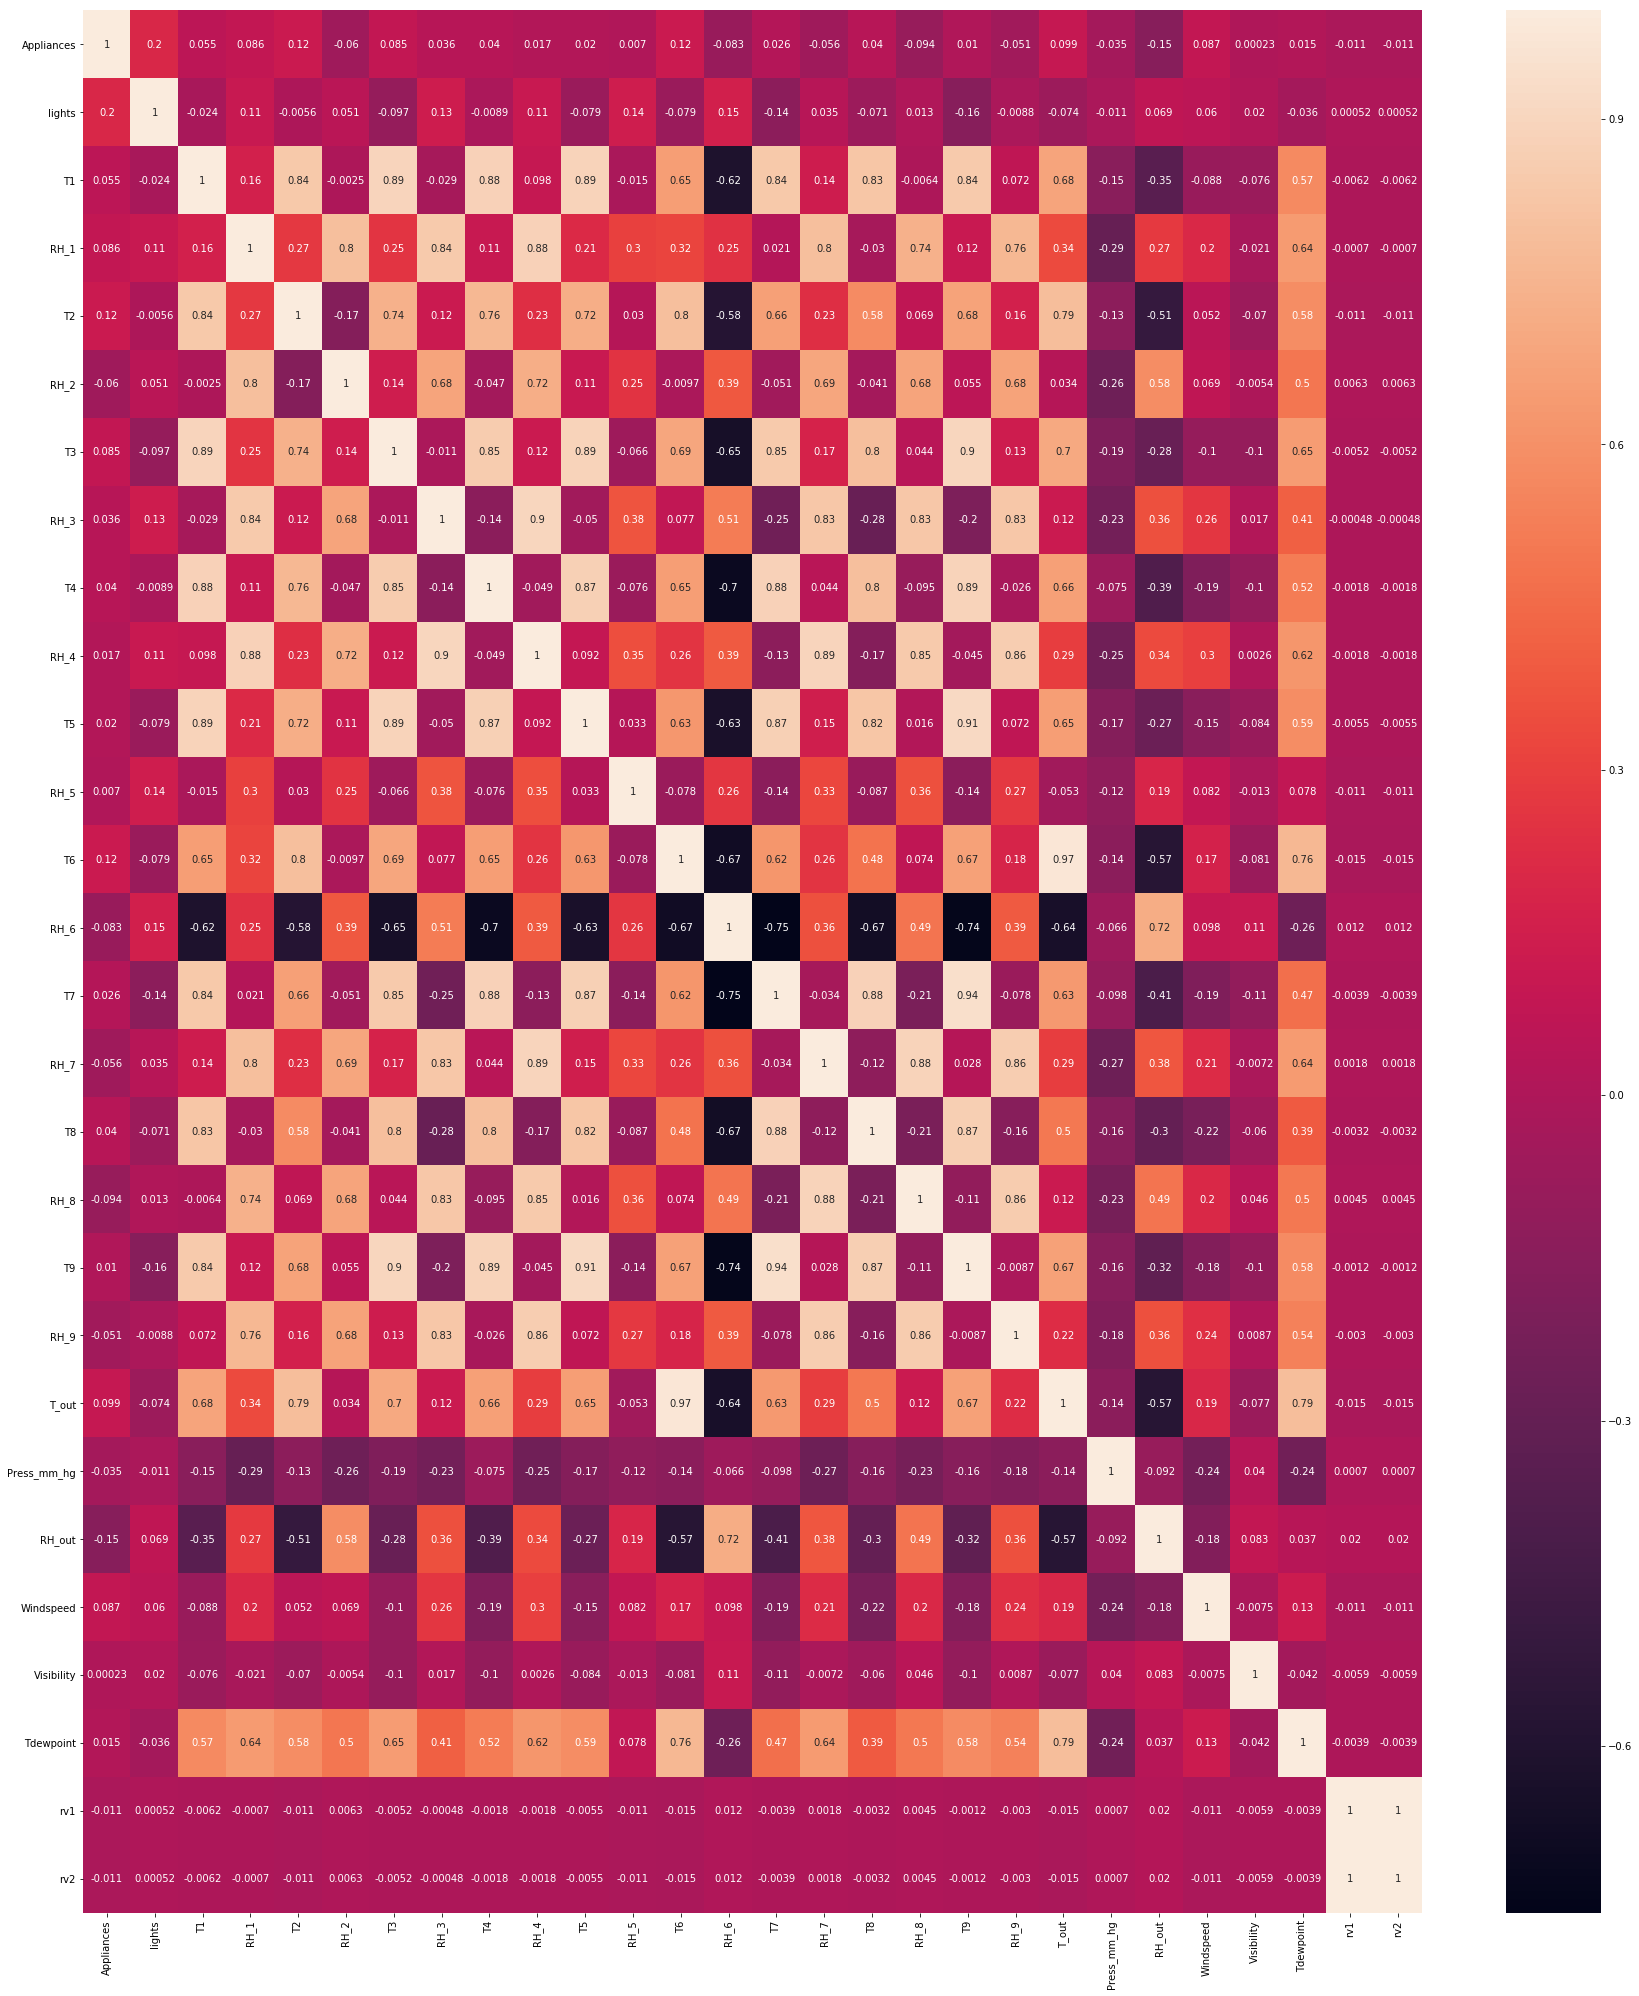

In [2]:
data=pd.read_csv("./Documents/energydata_complete.csv")
corr = data.corr()
f, ax = plt.subplots(figsize=(30,35))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,annot = True)

In [3]:
data = data.drop('rv2', 1)
# Converting Date object to Datetime object
data['date']=pd.to_datetime(data['date'])

# Adding day of week column
data['Day_of_week']=data['date'].dt.weekday_name

# Adding month number column
data['Month_Number']=data['date'].dt.month

# Adding Time column
data['Time']=data['date'].dt.time

# Adding month number column
data['Date_number']=data['date'].dt.date

# Geting the weekday number
data["Weekday_number"]=data['date'].dt.weekday

type(data["Day_of_week"])

#Adding Weekday column
if str(data.Day_of_week)=="Sunday" or str(data.Day_of_week)=="Saturday":
    data["Weekday_Column"]=1
else:
    data["Weekday_Column"]=0

data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Windspeed,Visibility,Tdewpoint,rv1,Day_of_week,Month_Number,Time,Date_number,Weekday_number,Weekday_Column
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,7.000000,63.000000,5.300000,13.275433,Monday,1,17:00:00,2016-01-11,0,0
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,6.666667,59.166667,5.200000,18.606195,Monday,1,17:10:00,2016-01-11,0,0
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,6.333333,55.333333,5.100000,28.642668,Monday,1,17:20:00,2016-01-11,0,0
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,6.000000,51.500000,5.000000,45.410389,Monday,1,17:30:00,2016-01-11,0,0
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,5.666667,47.666667,4.900000,10.084097,Monday,1,17:40:00,2016-01-11,0,0
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,5.333333,43.833333,4.800000,44.919484,Monday,1,17:50:00,2016-01-11,0,0
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,...,5.000000,40.000000,4.700000,47.233763,Monday,1,18:00:00,2016-01-11,0,0
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,...,5.166667,40.000000,4.683333,33.039890,Monday,1,18:10:00,2016-01-11,0,0
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,...,5.333333,40.000000,4.666667,31.455702,Monday,1,18:20:00,2016-01-11,0,0
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,...,5.500000,40.000000,4.650000,3.089314,Monday,1,18:30:00,2016-01-11,0,0


In [4]:
data.rename(columns={'T1':'Kitchen_Temp','RH_1':'Kitchen_Hum','T2':'LivingRoom_Temp','RH_2':'LivingRoom_Hum',
                   'T3':'LaundryRoom_Temp','RH_3':'LaundryRoom_Hum','T4':'OfficeRoom_Temp','RH_4':'OfficeRoom_Hum',
                   'T5':'BathRoom_Temp','RH_5':'BathRoom_Hum','T6':'OutsideNorth_Temp','RH_6':'OutsideNorth_Hum',
                   'T7':'IroningRoom_Temp','RH_7':'IroningRoom_Hum','T8':'TeenagerRoom_Temp','RH_8':'TeenagerRoom_Hum',
                   'T9':'ParentRoom_Temp','RH_9':'ParentRoom_Hum','T_out':'Outside_Temp','Press_mm_hg':'Pressure',
                   'RH_out':'Humidity'},inplace=True)
data['Energy_consumed']=data['Appliances']+data['lights']

In [5]:
data.to_csv('./Documents/Revised_Data.csv', index=True, header=True)

In [7]:
dataset = pd.read_csv('./Documents/Revised_data.csv')

In [ ]:
dataset = dataset.drop('date',1)
dataset = dataset.drop('Date_number',1)
dataset = dataset.drop('Time',1)
dataset = dataset.drop('Day_of_week',1)

# Predective Model Implemtation

In [13]:
X = dataset.iloc[:,3:31].values
Y = dataset.iloc[:,31].values #Energy Consumed
dataset.iloc[:,3:31]

,Kitchen_Temp,Kitchen_Hum,LivingRoom_Temp,LivingRoom_Hum,LaundryRoom_Temp,LaundryRoom_Hum,OfficeRoom_Temp,OfficeRoom_Hum,BathRoom_Temp,BathRoom_Hum,...,Outside_Temp,Pressure,Humidity,Windspeed,Visibility,Tdewpoint,rv1,Month_Number,Weekday_number,Weekday_Column
0,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,...,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,1,0,0
1,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,...,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,1,0,0
2,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,...,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,1,0,0
3,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,...,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,1,0,0
4,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,...,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,1,0,0
5,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,45.730000,17.133333,55.030000,...,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,1,0,0
6,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,45.790000,17.100000,54.966667,...,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,1,0,0
7,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,45.863333,17.100000,54.900000,...,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,1,0,0
8,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,45.790000,17.166667,55.000000,...,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,1,0,0
9,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,46.096667,17.100000,55.000000,...,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,1,0,0


In [14]:
etc = ExtraTreesRegressor(n_estimators = 50, random_state=np.random)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=np.random)
etc.fit(X_train,Y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
          oob_score=False,
          random_state=<module 'numpy.random' from 'C:\\Users\\rishi\\Anaconda3\\lib\\site-packages\\numpy\\random\\__init__.py'>,
          verbose=0, warm_start=False)

In [15]:
etc.score(X_train, Y_train)

0.999999996811832

In [16]:
etc.score(X_test, Y_test)

0.6513619899579773

In [17]:
import numpy as np
def mean_absolute_percentage_error(Y_train,train_pred): 
    Y_train, train_pred = np.array(Y_train), np.array(train_pred)
    return np.mean(np.abs((Y_train,train_pred) / Y_train)) * 100

In [18]:
train_pred =etc.predict(X_train)
test_pred = etc.predict(X_test)

In [19]:
from sklearn.metrics import*
import math
## Mean absolute error
MAE = mean_absolute_error(Y_train,train_pred)
print('MAE of Training Data =', MAE)
## Mean squared error
MSE = mean_squared_error(Y_train,train_pred)
RMSE = math.sqrt(MSE)
print('RMSE of Training Data =',RMSE)
## R-square score of this model
R2 = r2_score(Y_train,train_pred)
print('R2 of Training Data =',R2)
## MAPE of this model
MAPE=mean_absolute_percentage_error(Y_train,train_pred)
print('MAPE of Training Data =',MAPE)

MAE of Training Data = 0.0001266784899923957
RMSE of Training Data = 0.005955667653409704
R2 of Training Data = 0.999999996811832
MAPE of Training Data = 100.00000323258521


In [20]:
MAE = mean_absolute_error(Y_test,test_pred)
print('MAE of Testing Data=',MAE)
## Mean squared error
MSE = mean_squared_error(Y_test,test_pred)
RMSE = math.sqrt(MSE)
print('RMSE of Testing Data=',RMSE)
## R-square score of this model
R2 = r2_score(Y_test,test_pred)
print('R2 of Testing Data=',R2)
## MAPE of this model
MAPE=mean_absolute_percentage_error(Y_test,test_pred)
print('MAPE of Testing Data=',MAPE)

MAE of Testing Data= 27.633797821129974
RMSE of Testing Data= 58.95557606646384
R2 of Testing Data= 0.6513619899579773
MAPE of Testing Data= 107.39571088252204


# Applying Boruta for Feature Selection 

In [21]:
feature_selector = BorutaPy(etc, n_estimators='auto', verbose=2, random_state=np.random)

In [22]:
feature_selector.fit(X,Y)
feature_selector.support_

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	26
Tentative: 	2
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	26
Tentative: 	0
Rejected: 	2


BorutaPy finished running.

Iteration: 	10 / 100
Confirmed: 	26
Tentative: 	0
Rejected: 	2


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False])

# Applying Model after feature selection

In [23]:
X1 = feature_selector.transform(X)
X1_train, X1_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.2, random_state=np.random)

In [24]:
etc.fit(X1_train,Y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=74, n_jobs=1,
          oob_score=False,
          random_state=<mtrand.RandomState object at 0x000001B4181BA048>,
          verbose=0, warm_start=False)

In [25]:
etc.score(X1_train, Y_train)

0.9999999966053073

In [26]:
etc.score(X1_test, Y_test)

0.6448630574616518

In [27]:
train_pred =etc.predict(X1_train)
test_pred = etc.predict(X1_test)

In [28]:
## Mean absolute error
MAE = mean_absolute_error(Y_train,train_pred)
print('MAE of Training Data =', MAE)
## Mean squared error
MSE = mean_squared_error(Y_train,train_pred)
RMSE = math.sqrt(MSE)
print('RMSE of Training Data =',RMSE)
## R-square score of this model
R2 = r2_score(Y_train,train_pred)
print('R2 of Training Data =',R2)
## MAPE of this model
MAPE=mean_absolute_percentage_error(Y_train,train_pred)
print('MAPE of Training Data =',MAPE)

MAE of Training Data = 0.0002738994378214038
RMSE of Training Data = 0.0060838669892949605
R2 of Training Data = 0.9999999966053073
MAPE of Training Data = 100.00001994474239


In [29]:
MAE = mean_absolute_error(Y_test,test_pred)
print('MAE of Testing Data=',MAE)
## Mean squared error
MSE = mean_squared_error(Y_test,test_pred)
RMSE = math.sqrt(MSE)
print('RMSE of Testing Data=',RMSE)
## R-square score of this model
R2 = r2_score(Y_test,test_pred)
print('R2 of Testing Data=',R2)
## MAPE of this model
MAPE=mean_absolute_percentage_error(Y_test,test_pred)
print('MAPE of Testing Data=',MAPE)

MAE of Testing Data= 27.577736084196687
RMSE of Testing Data= 62.104435278312685
R2 of Testing Data= 0.6448630574616518
MAPE of Testing Data= 105.48499852939281
